In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('/data/workspace_files/Bicicletas.csv')

In [3]:
dados.head()

,clima,temperatura,bicicletas_alugadas
0,2,0.363625,985
1,2,0.353739,801
2,1,0.189405,1349
3,1,0.212122,1562
4,1,0.229270,1600


In [4]:
dados.shape

(731, 3)

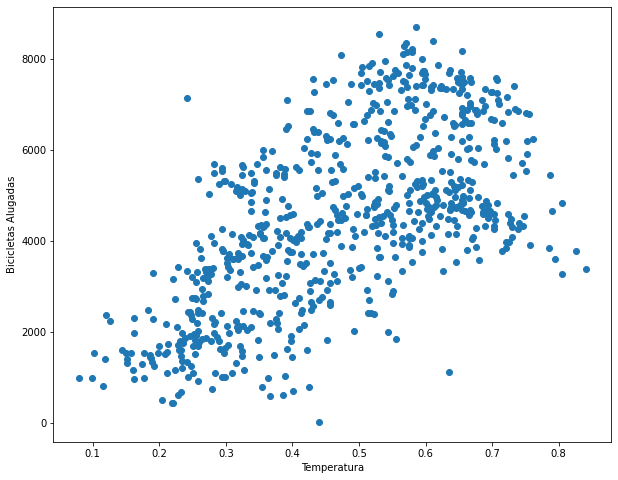

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(dados.temperatura, dados.bicicletas_alugadas)
plt.ylabel('Bicicletas Alugadas')
plt.xlabel('Temperatura')

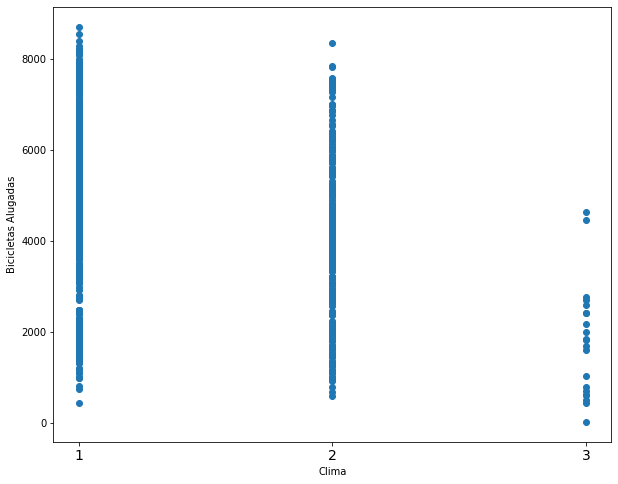

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(dados.clima, dados.bicicletas_alugadas)
plt.ylabel('Bicicletas Alugadas')
plt.xlabel('Clima')
indice=[1,2,3]
plt.xticks(indice, fontsize=14)

In [7]:
y = dados.bicicletas_alugadas.values
y

In [8]:
X = dados[['clima', 'temperatura']].values
X

In [9]:
# normalizando os valores do eixo X
X = X/np.amax(X, axis=0)
X

In [10]:
# normalizando os valores do eixo y
y_max = np.amax(y)
y = y/y_max
y

In [11]:
def sigmoid(soma):
    return 1/(1+np.exp(soma))

In [12]:
def relu(soma):
    return np.maximum(0, soma)

In [13]:
arquiterura = [
    {"dim_entrada":2, "dim_saida":50, "ativacao":"relu"},
    {"dim_entrada":50, "dim_saida":1, "ativacao":"sigmoid"}
]

In [14]:
def inicia_camadas(arquitetura, seed=99):
    np.random.seed(seed)
    numero_camadas = len(arquitetura)
    valores_parametros = {}
    for indice, camada in enumerate(arquitetura):
        indice_camada = indice + 1
        tamanho_camada_entrada = camada["dim_entrada"]
        tamanho_camada_saida = camada["dim_saida"]
        valores_parametros['P' + str(indice_camada)] = np.random.randn(tamanho_camada_saida,
        tamanho_camada_entrada)
        valores_parametros['b' + str(indice_camada)] = np.random.randn(tamanho_camada_saida, 1) *0.1
    return valores_parametros

In [15]:
def propaga_uma_camada(ativado_anterior, pesos_atual, b_atual, ativacao="relu"):
    saida_atual = np.dot(pesos_atual, ativado_anterior) + b_atual
    if ativacao == "relu":
        func_ativacao = relu
    elif ativacao == "sigmoid":
        func_ativacao = sigmoid
    return func_ativacao(saida_atual), saida_atual

In [16]:
def propaga_total(X, valores_parametros, arquitetura):
    memoria = {}
    ativado_atual = X
    for indice, camada in enumerate(arquitetura):
        indice_camada = indice + 1
        ativado_anterior = ativado_atual
        func_ativacao_atual = camada["ativacao"]
        pesos_atual = valores_parametros["P" + str(indice_camada)]
        b_atual = valores_parametros["b" +str(indice_camada)]
        ativado_atual, saida_atual =  propaga_uma_camada(ativado_anterior, pesos_atual,
        b_atual, func_ativacao_atual)
        memoria["A" + str(indice)] = ativado_anterior
        memoria["Z" +str(indice_camada)] = saida_atual
    return ativado_atual, memoria

In [17]:
valores_parametros = inicia_camadas(arquiterura, seed=99)

In [18]:
y_estimado, memoria = propaga_total(np.transpose(X), valores_parametros, arquiterura)

In [19]:
def valor_custo(Y_predito, Y):
    m = Y_predito.shape[1]
    custo = -1/m * (np.dot(Y, np.log(Y_predito).T) + np.dot(1-Y, np.log(1 - Y_predito).T))
    return np.square(custo)

In [20]:
def atualiza(valores_parametros, gradientes, arquitetura, taxa_aprendizagem):
    for indice_camada, camada in enumerate(arquitetura, 1):
        valores_parametros["P"+ str(indice_camada)] -= taxa_aprendizagem * gradientes[
            "dP" + str(indice_camada)]
        valores_parametros["b"+ str(indice_camada)] -= taxa_aprendizagem * gradientes[
            "db" + str(indice_camada)]
    return valores_parametros    

In [21]:
def retropropagacao_total(Y_predito, Y, memoria, valores_parametros, arquitetura):
    gradientes = {}
    Y = Y.reshape(Y_predito.shape)
    dAtivado_anterior = -(np.divide(Y,Y_predito) - np.divide(1-Y, 1-Y_predito))
    for indice_camada_anterior, camada in reversed(list(enumerate(arquitetura))):
        indice_camada_atual = indice_camada_anterior + 1
        funcao_ativacao_atual = camada[ativacao]
        dAtivado_atual = dAtivado_anterior
        ativado_anterior = memoria["A"+ str(indice_camada_anterior)]
        saida_atual = memoria["Z"+ str(indice_camada_atual)]
        pesos_atual = valores_parametros["P"+ str(indice_camada_atual)]
        b_atual = valores_parametros["b"+ str(indice_camada_atual)]
        dAtivado_anterior, dPesos_atual, db_atual = retropropagacao_uma_camada(
            dAtivado_atual, pesos_atual, b_atual, saida_atual, ativado_anterior, funcao_ativacao_atual)
        
        gradientes["dP"+ str(indice_camada_atual)] = dPesos_atual
        gradientes["db"+ str(indice_camada_atual)] = db_atual
    return gradientes

In [22]:
def sigmoid_retro(dAtivado, saida):
    sig = sigmoid(saida)
    return dAtivado * sig * (1 - sig)

In [23]:
def relu_retro(dAtivado, saida):
    d_saida = np.array(dAtivado, copy = True)
    d_saida[saida <= 0] = 0
    return d_saida

In [24]:
def retropropagacao_uma_camada(dAtivado_atual, pesos_atual, b_atual, saida_atual, ativado_anterior,
                               ativacao="relu"):
    m = ativado_anterior.shape[1]
    if ativacao == "relu":
        fun_ativacao_retro = relu_retro
    elif fun_ativacao_retro == "sigmoid":
        fun_ativacao_retro = sigmoid_retro
    else:
        raise Exception("Ainada não iomplementado")
    
    dSaida_atual = func_ativacao_retro(dAtivado_atual, saida_atual)
    dPesos_atual = np.dot(dSaida_atual, ativado_anterior.T) / m
    db_atual = np.sum(dSaida_atual, axis=1, keepdims=True) / m
    dAtivado_anterior = np.dot(pesos_atual.T, dSaida_atual)
    return dAtivado_anterior, dPesos_atual, db_atual

In [25]:
def treino(X, y, X_teste, y_teste, arquitetura, epocas, taxa_aprendizagem):
    valores_parametros = inicia_camadas(arquitetura, 2)
    historia_custo = []
    historia_custo_teste = []
    for i in range(epocas):
        y_predito, memoria = propaga_total(X, valores_parametros, arquitetura)
        y_predito_teste, memoria2 = propaga_total(X_teste, valores_parametros, arquitetura)
        custo = valor_custo(y_predito, y)
        historia_custo.append(custo)
        custo_teste = valor_custo(y_predito_teste, y_teste)
        historia_custo_teste.append(custo_teste)
        gradientes = retropropagacao_total(y_predito, y, memoria, valores_parametros, arquitetura)
        valores_parametros = atualiza(valores_parametros, gradientes, arquitetura, taxa_aprendizagem)
        if(i % 50):
            print(f'Iteração: {i} - custo {custo}')
        return  valores_parametros, historia_custo, historia_custo_teste

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=30)